<a href="https://colab.research.google.com/github/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Akshat Mishra

# **Project Summary -**

### **Introduction**
Yes Bank, a prominent player in the Indian financial sector, has been a focal point in the news since 2018 due to a high-profile fraud case involving Rana Kapoor. This event has had a significant impact on the bank's stock prices, making it an intriguing subject for financial analysis and prediction. The primary goal of this project is to predict Yes Bank's monthly closing stock price using a linear regression model.<br>
### **Dataset**
We have used the yes bank stock price dataset. This dataset contains 5 different features that can be used for predicting close price of the stock. These features are -
1. Date
2. Open
3. High
4. Low
5. Close

### **Objective**
The main objective of this project is to predict the stocks' closing price for each month using a linear regression model.
### **Methodology**
1. Data Preparation and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Selection
4. Modeling
5. Evaluation

### **Conclusion**
The project aims to demonstrate the applicability of Linear Regression model in financial forcasing.







# **GitHub Link -**

https://github.com/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank, a significant entity in the Indian financial sector, has experienced notable fluctuations in its stock prices, particularly since 2018 due to a high-profile fraud case involving its founder, Rana Kapoor. These fluctuations pose a challenge for investors and analysts aiming to predict future stock prices accurately. The objective of this project is to develop a predictive model that can forecast the monthly closing stock price of Yes Bank.**

**The main goal is to determine whether a linear regression model can effectively predict the closing stock prices of Yes Bank, thus providing valuable insights and potential forecasting tools for investors and financial analysts.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4 : Machine Learning/Capstone Project Regression/data_YesBank_StockPrices.csv')

### Dataset First View

In [7]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [9]:
# Detaset Statistics
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


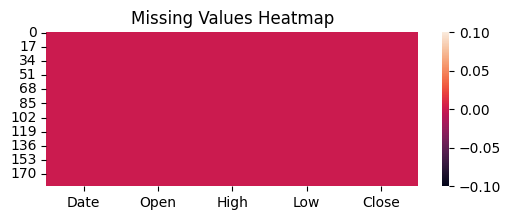

In [13]:
# Visualizing the missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull())
plt.title('Missing Values Heatmap')
plt.show()

**The absence of color variation in the heatmap indicates that there are no null values in the DataFrame. All values are present, which is why the entire heatmap shows a uniform color.**

### What did you know about your dataset?

### Insights from the info() method -
*   The DataFrame has no missing values (nulls) in any of the columns, which means we don't to treat missing values.
*   The "Date column" contains data in an object format, which suggests it might need to be converted to a datetime format for analysis.
*   The other columns (Open, High, Low, Close) are numerical which are suitable for stock price analysis.

### Insights from the describe() method -
*   The data for all columns showing a wide range, and standard deviation is also high which means there is high valatility in the prices.
*   As the mean is higher than the median for all columns, which suggest a skew in the data distribution.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [15]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**There are 5 variables -**
1. **Date** - Date of the record. Data type is object need to change into datetime.
2. **Open** - opening price of the share/stock (Numerical)
3. **High** - Highest price of the share for that day (Numerical)
4. **Low** - Lowest Price of the share for that day (Numerical)
5. **Close** - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
data.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Converting datatype of 'Date' column from string to datetime.
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [18]:
# Checking if the 'Date' column looks different from earlier
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [19]:
# Checking the Datatype of the 'Date' Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [20]:
# Extracting year from 'Date' column and creating a seperate column for Year
data['Year'] = data['Date'].dt.year

In [21]:
# Extracting month from 'Date' column and creating a seperate column for Month
data['Month'] = data['Date'].dt.month

In [22]:
# Checking for the new column 'Year'
data.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [23]:
# Defining Dependent & Independent variables for further implementations
dependent_variable = 'Close'
independent_variables = ['Open', 'High', 'Low']

### What all manipulations have you done and insights you found?



*   I have changed datatype of 'Date' column from string to datetime.
*   Extracted the year & month from date column and created a new column named 'Year' & 'Month' for future needs.
*   Divided the columns in independent and dependent variables for further implementations.
*   There are no null values and duplicate values. Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Distribution of 'Open' Variable)

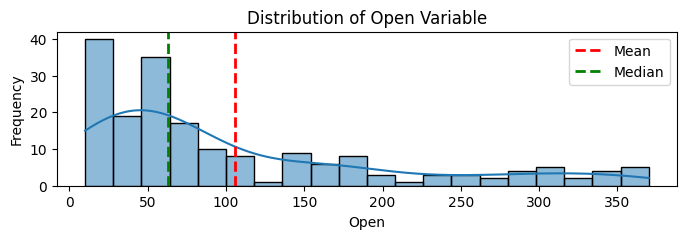

In [24]:
# Chart - 1 Visualization Code
# Distribution of 'Open' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['Open'], bins=20, kde=True)

plt.axvline(data['Open'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Open'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Open Variable')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.legend()
plt.show()

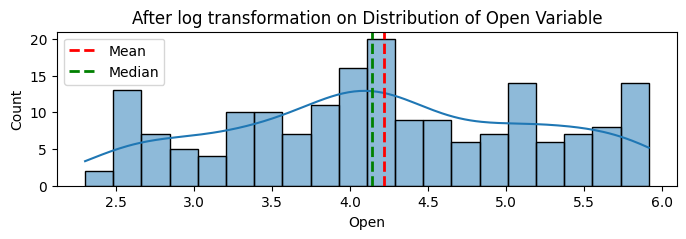

In [25]:
# Applying log transformation because it has right skewed distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Open']), bins=20, kde=True)

plt.axvline(np.log(data['Open']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Open']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Open Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Open' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution. Which will be required for a good model.

#### Chart - 2 (Distribution of 'Close' Variable)

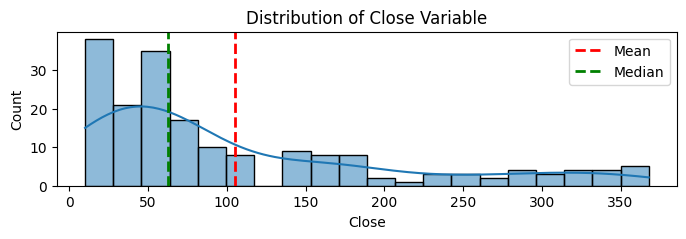

In [26]:
# Chart - 2 visualization code
# Distribution of 'Close' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['Close'], bins=20, kde=True)

plt.axvline(data['Close'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Close'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Close Variable')
plt.legend()
plt.show()

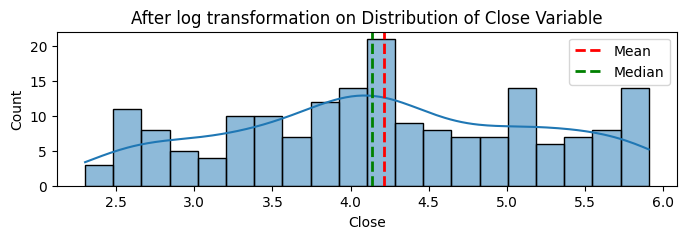

In [27]:
# Applying log transformation because of the skewness in the distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Close']), bins=20, kde=True)

plt.axvline(np.log(data['Close']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Close']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Close Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Close' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 3 (Distribution of 'High' Variable)

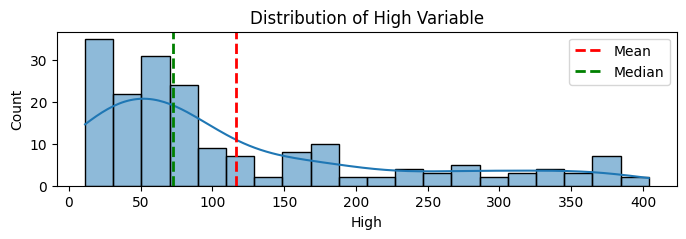

In [28]:
# Chart - 3 visualization code
# Distribution of 'High' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['High'], bins=20, kde=True)

plt.axvline(data['High'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['High'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of High Variable')
plt.legend()
plt.show()

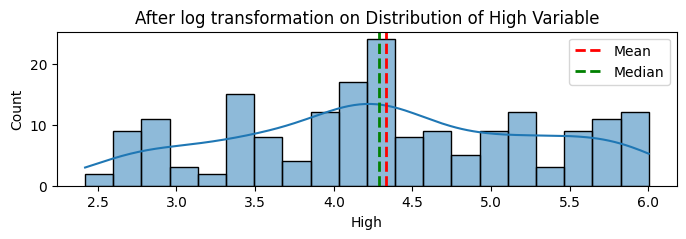

In [29]:
# Applying log transformation to the above distribution as i can see some skewness in the data
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['High']), bins=20, kde=True)

plt.axvline(np.log(data['High']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['High']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of High Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'High' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 4 (Distribution of 'Low' Variable)

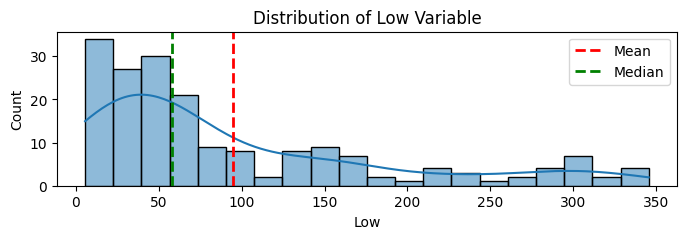

In [30]:
# Chart - 4 visualization code
# Distribution of 'Low' Variable along with Mean & Median Line
plt.figure(figsize=(8, 2))
sns.histplot(data['Low'], bins=20, kde=True)

plt.axvline(data['Low'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Low'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Low Variable')
plt.legend()
plt.show()

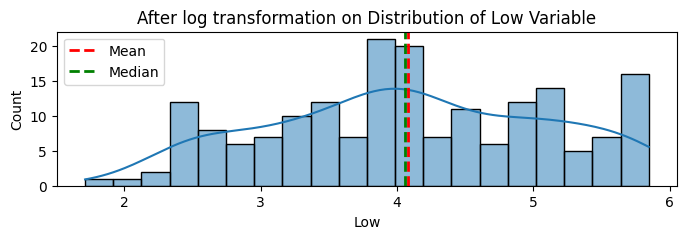

In [31]:
# Applying log transformation to the above distribution as there is some skewness in the data
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Low']), bins=20, kde=True)

plt.axvline(np.log(data['Low']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Low']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Low Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Low' Variable

##### 2. What is/are the insight(s) found from the chart?

Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 5 (Box Plots for Price data)

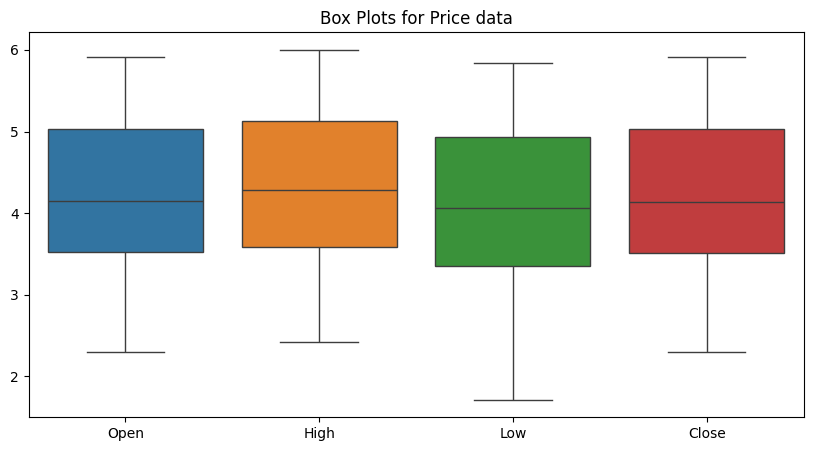

In [32]:
# Chart - 5 visualization code
# Box plot for price data
plt.figure(figsize=(10, 5))
sns.boxplot(data=np.log(data[['Open', 'High', 'Low', 'Close']]))
plt.title('Box Plots for Price data')
plt.show()

##### 1. Why did you pick the specific chart?

To check if there are outliers exists or not in the data.

##### 2. What is/are the insight(s) found from the chart?

After applying log transformation, outliers appeared to be normalised.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps for a good model, however for a small dataset, it is also not advisable to completely remove outliers.

#### Chart - 6 (Relation between 'Open' and Dependent Variable 'Close')

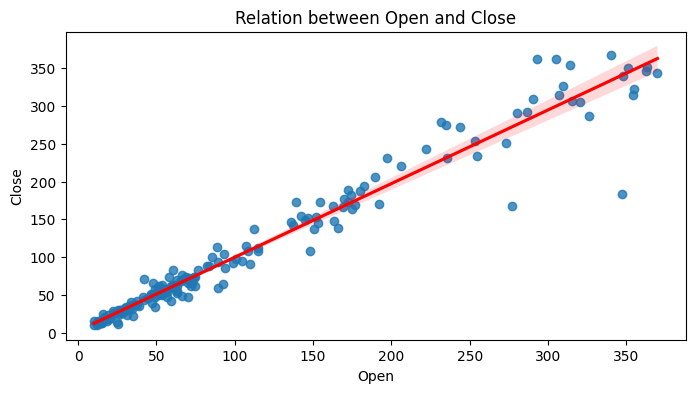

In [33]:
# Chart - 6 visualization code
# Visualising the relation between 'Open' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='Open', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between Open and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables. We used it to check for the relation between 'Open' and 'Close'.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'Open' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 7 (Relation between 'High' and Dependent Variable 'Close')

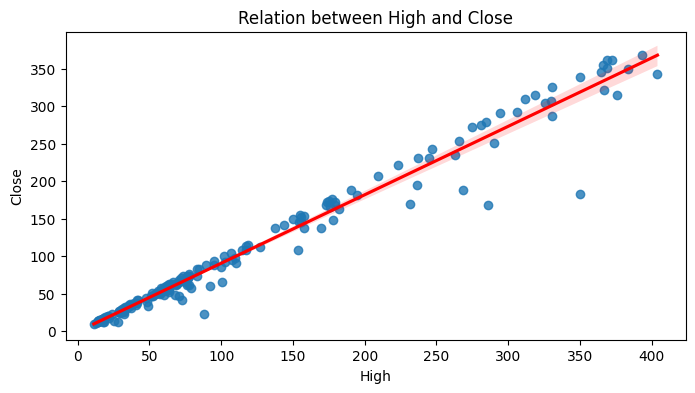

In [34]:
# Chart - 7 visualization code
# Visualising the relation between 'High' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='High', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between High and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'High' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 8 (Relation between 'Low' and Dependent Variable 'Close')


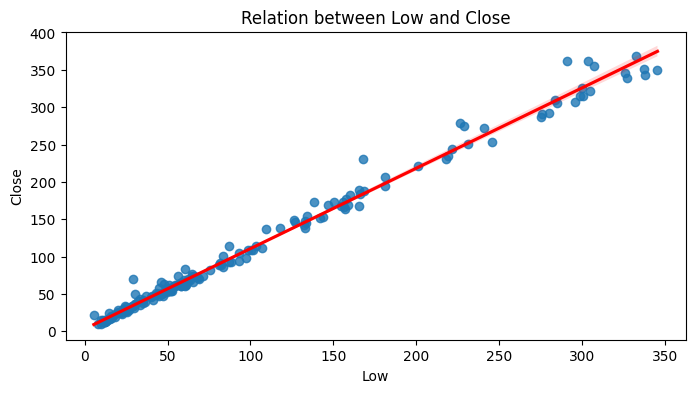

In [35]:
# Chart - 8 visualization code
# Visualising the relation between 'Low' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='Low', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between Low and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'Low' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9 (Yearly trend of Closing Price)

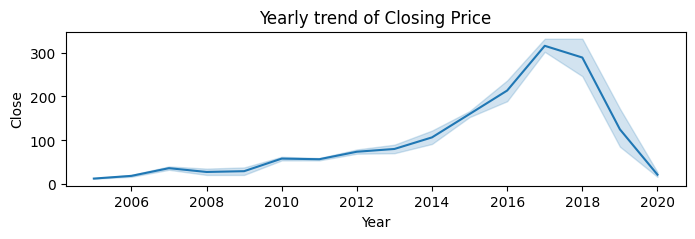

In [36]:
# Chart - 9 visualization code
# Visualization of average closing price trend during all the years

plt.figure(figsize=(8, 2))
sns.lineplot(x='Year', y='Close', data=data)
plt.title('Yearly trend of Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check the trend of closing price during all these years.

##### 2. What is/are the insight(s) found from the chart?

*   Stock price is increasing till 2018.
*   After 2018 price is decreased at very high rate.
*   We can say something happened in 2018 which impected the stock price negatively.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As mentioned in problem statement that some high profile fraud case happened in 2018, which may have impected the business negatively, which we can also be seen in above visualization.

#### Chart - 10 (1 Day Moving Average of Close Price)

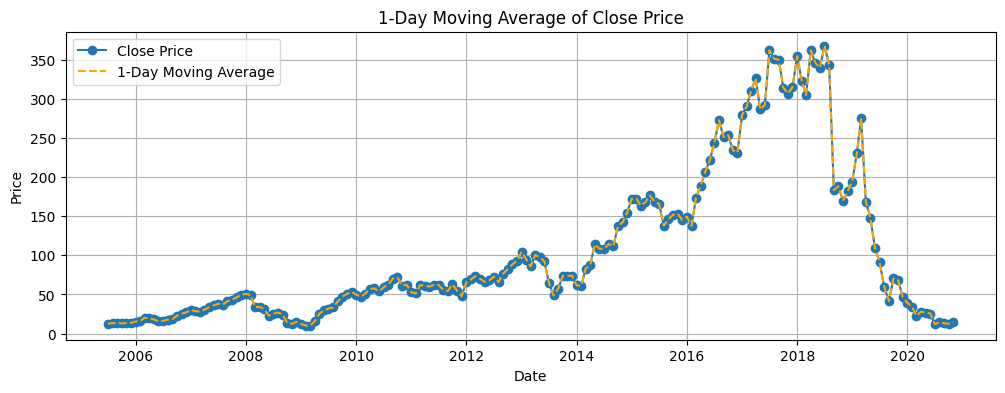

In [37]:
# Chart - 10 visualization code
# Visualization for 1 Day Moving Average
plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['Close'], label='Close Price', marker='o')
plt.plot(data['Date'], data['Close'].rolling(window=1).mean(), label='1-Day Moving Average', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('1-Day Moving Average of Close Price')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To check the 1 Day moving Average

##### 2. What is/are the insight(s) found from the chart?

I found that price was keep increasing till 2018 and suddenly started to go down. But increased a little between 2018 and 2020 and again went down.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The social news impacted the stock price negatively. And i was steadily showed growth till 2018 and was highly volatile after 2018.

#### Chart - 11 (1 Day Candle Stick Chart Over the period)

In [38]:
# Installation of Required library for Candle Stick Chart
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [39]:
# Importing library required for candle stick pattern chart
import mplfinance as mpf

In [40]:
# Setting Date as Index
data.set_index('Date', inplace=True)

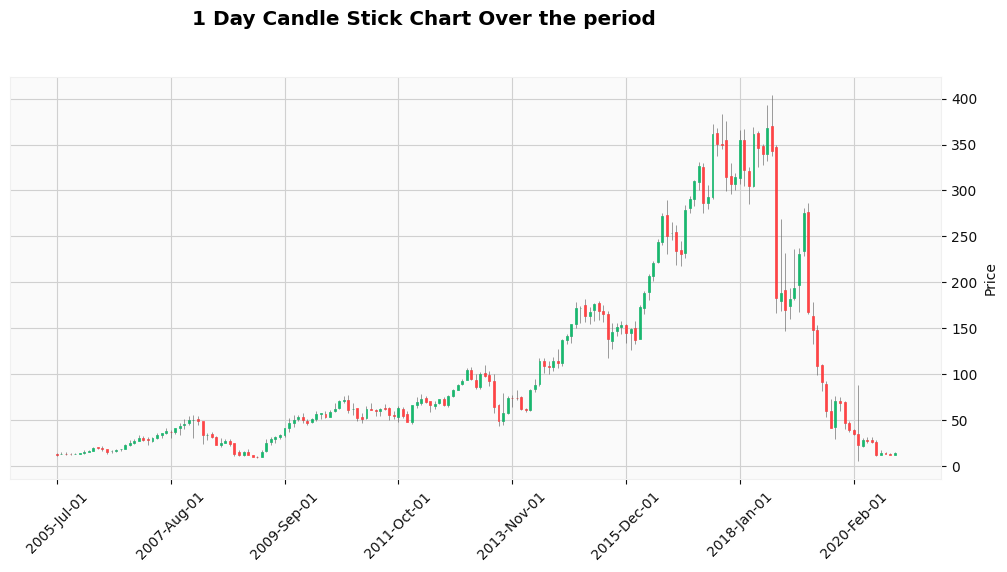

In [41]:
# Chart - 11 visualization code
# Visualization for candle stick chart of price over the period

mpf.plot(data[['Open', 'High', 'Low', 'Close']], type='candle', figratio=(9, 4) , style='yahoo' , title='1 Day Candle Stick Chart Over the period')

##### 1. Why did you pick the specific chart?

This is a widely used chart for stocks to get the idea of the volatility in the data, thats why we used it.

##### 2. What is/are the insight(s) found from the chart?

Except 2018 , there is not much veriation in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 12 ('nth Day Close' vs. 'n+1th Day Open')

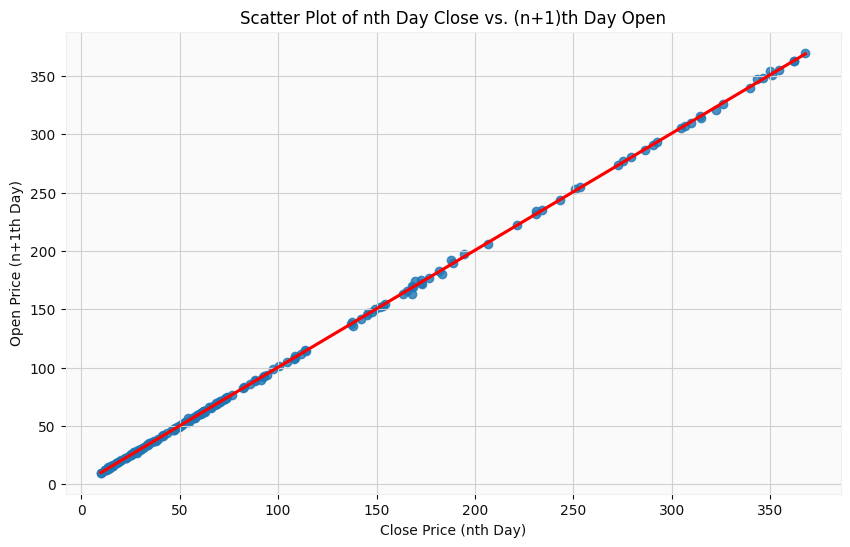

In [42]:
# Chart - 12 visualization code

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Close'], y=data['Open'].shift(-1), data=data, line_kws=dict(color='red'))

# Adding labels and title
plt.title('Scatter Plot of nth Day Close vs. (n+1)th Day Open')
plt.xlabel('Close Price (nth Day)')
plt.ylabel('Open Price (n+1th Day)')

# Show plot
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 (Average Closing price over Months)

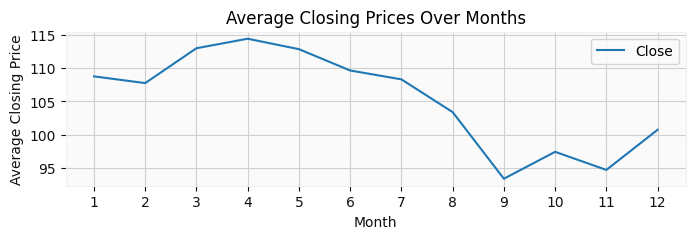

In [43]:
# Chart - 13 visualization code
# Visualising mean of closing prices over months
plt.figure(figsize=(8, 2))
data.groupby('Month')['Close'].mean().plot()
plt.xticks(ticks=range(1, 13))
plt.title('Average Closing Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the Price distribution over months.

##### 2. What is/are the insight(s) found from the chart?

We can see,
*   The price is lower in the month of September, October and November.
*   Closing price is higher in the months of March, april and May.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   May be the public sentiments is making prices go high and low during this specific months.
*   Decision on Investing in the stock can be taken using the above info.

#### Chart - 14 - Correlation Heatmap

<Axes: >

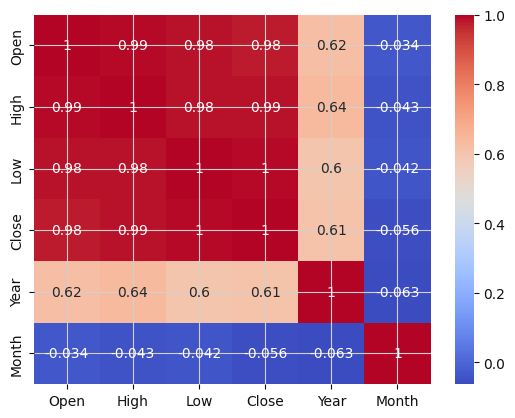

In [44]:
# Correlation Heatmap visualization code
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To visualize the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

*   Clossing price has very strong corellation with open, high and low variable.
*   Also we can see multicollinearity here because independent variables are also strongly co-related with eachother.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind='kde')

##### 1. Why did you pick the specific chart?

To analyse the patterns of data and realationship between the features.
Its good to visualise because here we get both scatter plot & distribution together. It's almost same as the correlation map but here we get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Open, Close, Low and High variables are having skewed distribution and showing strong linear relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Three hypothetical statements are formed below -
1. Average Closing stock price is more than 100.
2. Average Closing stock price is equals to average Opening stock Price.
3. Average closing stock price in 2018 is more than 300.

### Hypothetical Statement - 1 (Average Closing stock price is more than 100)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0)** : The average closing stock price is less than or equal to 100

**Alternative hypothesis (H1)** : The average closing stock price is greater than 100.

Test type : Right Tailed test

Singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Importing required libraries
from scipy.stats import norm

mean = 100
sample_mean = np.mean(data['Close'])         # mean
sample_size = data['Close'].size             # sample size
std = np.std(data['Close'])                  # standard deviation

# z-test
z_value = (sample_mean - mean) / (std / np.sqrt(sample_size))

# calculate p-value
p_value = 1 - norm.cdf(z_value)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value > significance_level:
    print(f"Failed to reject the Null Hypothesis as p-value = {p_value}")
else:
    print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")

##### Which statistical test have you done to obtain P-Value?

I used the Z-test to get the P-Value and found that, at 5% significance level we are unable to reject the null hypothesis.

##### Why did you choose the specific statistical test?

Reasone behind choosing the Z-Test is the size of the observations which is larger than 30.

### Hypothetical Statement - 2 (Average Closing Stock Price is Equals to Average Opening Stock Price)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)** : The average closing stock price is equal to the average opening stock price.

**Alternative Hypothesis (H1)** : The average closing stock price is not equal to the average opening stock price.

Test : Two-Tailed Test

Significance level : 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Calculate means for the 'Open' and 'Close' prices
mean_open = np.mean(data['Open'])              # Mean of Open prices
mean_close = np.mean(data['Close'])            # Mean of Close prices

# Sample sizes for Open and Close prices
size_open = data['Open'].size                   # Size of Open prices
size_close = data['Close'].size                 # Size of Close prices

# Calculate variances for the Open and Close prices
variance_open = np.var(data['Open'])            # Variance of Open prices
variance_close = np.var(data['Close'])          # Variance of Close prices

# z-test calculation
z_statistic = (mean_open - mean_close) / np.sqrt((variance_open / size_open) + (variance_close / size_close))

# Calculate the p-value for a two-tailed test
p_value = norm.cdf(z_statistic)

# Adjust p-value for two-tailed test
if p_value < 0.5:
    p_value *= 2  # Double the p-value if it is less than 0.5
else:
    p_value = (1 - p_value) * 2  # Otherwise, calculate the upper tail

# Conclusion
alpha = 0.05
if p_value > alpha:
    print(f"Failed to reject the null hypothesis; p-value = {p_value}")
else:
    print(f"Null hypothesis rejected; p-value = {p_value}")


##### Which statistical test have you done to obtain P-Value?

I used the Z-test to get the P-Value and found that, at 5% significance level we are unable to reject the null hypothesis.

And we can say that the closing prices tend to move similarly to the opening prices.

##### Why did you choose the specific statistical test?

I used z-test because the sample size is larger than 30.

### Hypothetical Statement - 3 (Average closing stock price in 2018 is more than 300)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)** : The average closing stock price in 2018 is less than or equal to 300.

**Alternative Hypothesis (H1)** : The average closing stock price in 2018 is greater than 300.

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Importing required libraries
from scipy.stats import t

# Define the population mean for comparison
population_mean = 100

# Filter the data for the year 2018 and calculate statistics
closing_prices_2018 = data['Close'][data['Year'] == 2018]
mean_sample = np.mean(closing_prices_2018)                    # Sample mean
sample_size = closing_prices_2018.size                        # Sample size
sample_std = np.std(closing_prices_2018)                      # Sample standard deviation

# Calculate the t-statistic
t_statistic = (mean_sample - population_mean) / (sample_std / np.sqrt(sample_size))

# Calculate the p-value for a right-tailed t-test
p_value = 1 - t.cdf(t_statistic, df=sample_size - 1)         # Degrees of freedom = sample_size - 1

# Set the significance level
alpha = 0.05

# Hypothesis Testing Conclusion
if p_value > alpha:
    print(f"Failed to reject the null hypothesis; p-value = {p_value}.")
else:
    print(f"Null hypothesis rejected; p-value = {p_value}.")


##### Which statistical test have you done to obtain P-Value?

I have used t-test to obtain P-Value and found that we have sufficient evidence to reject the Null hypothesis at 5% significance level. so, we can conclude that average stock closing price in 2018 is more than 300.

##### Why did you choose the specific statistical test?

Because sample size is less than 30.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

No missing values in the Data

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the data

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# No Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

No outliers present in the Data

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# One-Hot Encoding for 'month'
data = pd.get_dummies(data, columns=['Month'])

# Display the encoded data
print(data.head())

In [ ]:
# Convert True/False to 1/0
data = data.astype(int)

# Display the encoded DataFrame
data.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used pd.get_dummies function which is used for one-hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# High, Low, Open variables arehighly correlated so we need to create one new valiable 'HLO' by taking the mean of High, Low, Open
data['HLO'] = data[['High', 'Low', 'Open']].mean(axis=1).round(2)
data.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
Selected_features = ['HLO', 'Year', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Close']
Selected_data = data[Selected_features]

##### What all feature selection methods have you used  and why?

1. Correlation
*   Selected features on the basis of the correlation with dependent variable.
2. Multicollinearity
*   Removed High, Low and Open columns from selected features because these are highly correlated with each other.
3. Feature Manipulation
*   Created a new feature 'HLO', having mean of high, low and open as they are highly correlated with each other.







##### Which all features you found important and why?

1. 'HLO' which is average of 'High', 'Low' and 'Open' is most important as it is highly correlated with dependent variable.
2. 'Year' and 'month' are also important features as it is a timeseries dataset and also has satisfactory correlation with dependent variable.

### 5. Data Transformation

In [ ]:
# Checking the distribution of 'HLO' using histplot with a line
plt.figure(figsize=(8, 4))
sns.histplot(data['HLO'], kde = True)
plt.title('Distribution of HLO')
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Apply log transformation to 'HLO' and visualise it
plt.figure(figsize=(8,4))
sns.histplot(np.log(data['HLO']), kde=True)
plt.title('Distribution of HLO after Log Transformation')
plt.show()

As we can saw, the distribution of 'HLO' was right skewed. So i used log transformation to normalise it.

### 6. Data Scaling

In [ ]:
# creating the set of dependent and independent variables
x = Selected_data.drop(labels=['Close'], axis=1)
y = Selected_data['Close']

In [ ]:
# Scaling the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

 I used Standard Scaler. Standard scaling ensures that each feature has a similar range and distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, Dimensionality reduction is not needed. Because it is the process of reducing the number of variables or features but we do not have too many features in the dataset.

In [ ]:
# DImensionality Reduction (If needed)

# DImensionality Reduction is not required here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Did not used any Dimensionality Reduction technique because its not needed here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### What data splitting ratio have you used and why?

**Data Splitting Ratio used here is 80/20.**

which means 80% of the data is used for training the model, and the remaining 20% is used for evaluating the model's performance on unseen data (i.e., testing data).
We used this ratio because we don't have a larger dataset and we need to use a decent amount of data to fulfil testing process. For a larger dataset we can use 90/10 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data is not imbalanced because we have the same number of observations throughout the dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)

# No Imbalanced Dataset

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Did not use any technique because dataset is balanced.

## ***7. ML Model Implementation***

### ML Model - 1 (Linear Regression)

In [ ]:
# ML Model - 1 Implementation (Linear Regression)
lr = LinearRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)

# Predict on the model
y_pred = lr.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model which is used here is Linear Regression model.

**Linear Regression** : It is a statistical method used to model the relationship between a dependent variable (often called the target or response variable) and one or more independent variables (called predictors or features). The goal of linear regression is to find the best-fitting linear relationship between the variables.

In [ ]:
# Calculating evaluation Metrics Score

MSE = mean_squared_error(y_test, y_pred)                          # Mean Squared Error (MSE)
RMSE = np.sqrt(MSE)                                               # Root Mean Squared Error (RMSE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)             # Mean Absolute Percentage Error (MAPE)
MAE =  mean_absolute_error(y_test, y_pred)                        # Mean Absolute Error (MAE)
R2_score = r2_score(y_test, y_pred)                               # R-squared (R²)
n = y_test.shape[0]                                               # Number of observations
p = x_test.shape[1]                                               # Number of independent variables
Adjusted_R2 = 1 - (1 - R2_score) * (n-1)/(n-p-1)                  # Adjusted R-squared

# Print evaluation metrics
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')
print(f'MAE: {MAE}')
print(f'R2_score: {R2_score}')
print(f'Adjusted_R2: {Adjusted_R2}')


In [ ]:
# Visualizing evaluation Metric Score
metrics_lr = [MAE, MSE, RMSE, MAPE, R2_score, Adjusted_R2]
metric_names_lr = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R Squared', 'Adjusted R Score']

# Visualize the metrics using a bar chart
plt.figure(figsize=(8, 4))
plt.bar(metric_names_lr, metrics_lr, color=['blue', 'green', 'red', 'purple', 'yellow'])
plt.title('Evaluation Metrics of Linear Regression Model')
plt.ylabel('Score')
plt.show()

**Interpretation** :

*   The high R² (0.984) and Adjusted R² (0.974) suggest that the model is very accurate in explaining the variance in the stock prices.
*   The relatively low RMSE (13.25) and MAE (8.99) indicate that the model's predictions are quite close to the actual values.
*   The MAPE of 11.1% indicates that, on average, the model's predictions are about 11.1% off from the actual values, which is generally considered acceptable in many forecasting scenarios.

In [ ]:
# Visualise the actual and precited values
plt.figure(figsize=(8, 4))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1(Linear Regression) Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid without the 'positive' parameter
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create the GridSearchCV object
Lr_gs = GridSearchCV(estimator=lr, param_grid=parameter, cv=5, scoring='r2')

# Fit the GridSearchCV model
Lr_gs.fit(x_train_scaled, y_train)

# Predict on the test and training sets
y_pred_test_gs = Lr_gs.predict(x_test_scaled)
y_pred_train_gs = Lr_gs.predict(x_train_scaled)

# Print the best parameters and score
print("Best parameters found: ", Lr_gs.best_params_)

# Calculate evaluation metrics
MSE_lr_gs = mean_squared_error(y_test, y_pred_test_gs)
RMSE_lr_gs = MSE_lr_gs ** 0.5
MAPE_lr_gs = mean_absolute_percentage_error(y_test, y_pred_test_gs)
MAE_lr_gs = mean_absolute_error(y_test, y_pred_test_gs)
R2_lr_gs = r2_score(y_test, y_pred_test_gs)
Adjusted_r2_lr_gs = 1 - (1 - R2_lr_gs) * (y_test.shape[0] - 1) / (y_test.shape[0] - x_test.shape[1] - 1)

# Print the metrics
print(f'MSE: {MSE_lr_gs}')
print(f'RMSE: {RMSE_lr_gs}')
print(f'MAPE: {MAPE_lr_gs}')
print(f'MAE: {MAE_lr_gs}')
print(f'R2_score: {R2_lr_gs}')
print(f'Adjusted_R2: {Adjusted_r2_lr_gs}')

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   MSE:  173.71342382897802
*   RMSE:  13.180038840192317
*   R2 Score:  0.9845679630375387
*   Adjusted R2 Score:  0.9747475758796088

MSE is lower than the simple linear regression model which means the model has improved in terms of predicting the unseen data.






### ML Model - 2 (Ridge Regression)

In [ ]:
# ML Model - 2 (Ridge Regression) Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train, y_train)

# Predict on the model
y_pred = ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Ridge Regression** is a type of linear regression that adds a regularization term (L2 penalty) to the cost function to prevent overfitting, especially in datasets with multicollinearity (correlated features). It modifies the standard linear regression by minimizing both the sum of squared errors (SSE) and the sum of squared coefficients, controlled by a parameter
𝛼
α.

In [ ]:
# Calculate Evaluation metrics score after using Ridge Regression

MSE_ridge = mean_squared_error(y_test, y_pred)                          # Mean Squared Error (MSE)
RMSE_ridge = np.sqrt(MSE_ridge)                                         # Root Mean Squared Error (RMSE)
MAPE_ridge = mean_absolute_percentage_error(y_test, y_pred)             # Mean Absolute Percentage Error (MAPE)
MAE_ridge =  mean_absolute_error(y_test, y_pred)                        # Mean Absolute Error (MAE)
R2_score_ridge = r2_score(y_test, y_pred)                               # R-squared (R²)
n = y_test.shape[0]                                                     # Number of observations
p = x_test.shape[1]                                                     # Number of independent variables
Adjusted_R2_ridge = 1 - (1 - R2_score_ridge) * (n-1)/(n-p-1)            # Adjusted R-squared

# Print Evaluation Metrics
print(f'MSE: {MSE_ridge}')
print(f'RMSE: {RMSE_ridge}')
print(f'MAPE: {MAPE_ridge}')
print(f'MAE: {MAE_ridge}')
print(f'R2_score: {R2_score_ridge}')
print(f'Adjusted_R2: {Adjusted_R2_ridge}')

While Ridge Regression is generally advantageous in many scenarios, the evaluation metrics indicate that in this case, it has not outperformed Simple Linear Regression for predicting Yes Bank's stock closing prices.

In [ ]:
# Visualizing evaluation Metric Score chart
metrics_ridge = [MAE_ridge, MSE_ridge, RMSE_ridge, MAPE_ridge, R2_score_ridge, Adjusted_R2_ridge]
metric_names_ridge = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R Squared', 'Adjusted R Score']

# Visualize the metrics using a bar chart
plt.figure(figsize=(8, 4))
plt.bar(metric_names_ridge, metrics_ridge, color=['blue', 'green', 'red', 'purple', 'yellow'])
plt.title('Evaluation Metrics of Ridge Regression Model')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 (Ridge Regression) Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid for Ridge Regression
param_grid = {
    'alpha': np.logspace(-4, 4, 10),  # Regularization strength
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create the Grid Search object
ridge_gs = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the Grid Search to the data
ridge_gs.fit(x_train, y_train)

# Predict on the test set using the best model
y_pred_test = ridge_gs.predict(x_test)

# Get the best parameters and the best score
print("Best Parameters:", ridge_gs.best_params_)
print("Best Cross-Validation Score:", ridge_gs.best_score_)

In [ ]:
# Implementing ridge again with best alpha value which is found by the GridSearch CV
ridge = Ridge(0.3593813663804626)

# Fit the Algorithm
ridge.fit(x_train, y_train)

In [ ]:
# Calculate evaluation metrics after GridSearch CV
MSE_ridge_gs = mean_squared_error(y_test, y_pred_test)
RMSE_ridge_gs = np.sqrt(MSE_ridge_gs)
R2_score_ridge_gs = r2_score(y_test, y_pred_test)
MAE_ridge_gs = mean_absolute_error(y_test, y_pred_test)
MAPE_ridge_gs = mean_absolute_percentage_error(y_test, y_pred_test)
Adjusted_R2_ridge_gs = 1 - (1 - R2_score_ridge_gs) * (y_test.shape[0] - 1) / (y_test.shape[0] - x_test.shape[1] - 1)

# Print the Evaluation metrics
print(f'MSE: {MSE_ridge_gs}')
print(f'RMSE: {RMSE_ridge_gs}')
print(f'R2_score: {R2_score_ridge_gs}')
print(f'MAE: {MAE_ridge_gs}')
print(f'MAPE: {MAPE_ridge_gs}')
print(f'Adjusted_R2: {Adjusted_R2_ridge_gs}')

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Improvement in MSE and RMSE:** The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) slightly improved after using GridSearchCV to tune the hyperparameters. This means that the tuned Ridge regression model fits the data slightly better, reducing prediction errors.

**Improvement in R² and Adjusted R²:** The R² score increased slightly (from 0.9839 to 0.9842), indicating a marginally better fit for the tuned model. Adjusted R² also increased, which accounts for the number of predictors in the model, implying that the optimized model explains the variance in the data a bit more effectively.

**Minor Improvement in MAE and MAPE:** The Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) improved slightly, meaning the optimized Ridge model provides more accurate predictions on average compared to the non-tuned version.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Business Impact of the ML Model**

1. **Risk Management:** With relatively low prediction errors (as shown by RMSE, MAE, and MAPE), businesses can more confidently mitigate financial risks related to stock market volatility.

2. **Efficient Decision-Making:** The high R² and adjusted R² scores indicate that the model effectively captures the underlying patterns in the data. This translates into better decision-making regarding buy/sell strategies, portfolio optimization, and stock performance analysis.

3. **Performance Monitoring:** Businesses can use this model to monitor real-time performance metrics of stock prices, comparing predictions with actual outcomes, thereby improving future strategies or adjusting financial plans dynamically.

### ML Model - 3 (Lasso Regression)

In [ ]:
# ML Model - 3(Lasso Regression) Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)

# Predict on the model
y_pred = lasso.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculate Evaluation metrics score after using Ridge Regression

MSE_lasso = mean_squared_error(y_test, y_pred)
RMSE_lasso = np.sqrt(MSE_lasso)
R2_score_lasso = r2_score(y_test, y_pred)
MAPE_lasso = mean_absolute_percentage_error(y_test, y_pred)
MAE_lasso = mean_absolute_error(y_test, y_pred)
n = y_test.shape[0]
p = x_test.shape[1]
Adjusted_R2_lasso = 1 - (1 - R2_score_lasso) * (n-1)/(n-p-1)

# Print Evaluation Metrics
print(f'MSE: {MSE_lasso}')
print(f'RMSE: {RMSE_lasso}')
print(f'R2_score: {R2_score_lasso}')
print(f'MAE: {MAE_lasso}')
print(f'MAPE: {MAPE_lasso}')
print(f'Adjusted_R2: {Adjusted_R2_lasso}')


The Lasso regression model performs slightly better than Ridge in terms of prediction accuracy. It has a lower MSE, MAE, and MAPE, indicating that it makes more accurate predictions both in absolute and percentage terms.

In [ ]:
# Visualizing evaluation Metric Score chart
metrics_lasso = [MAE_lasso, MSE_lasso, RMSE_lasso, MAPE_lasso, R2_score_lasso, Adjusted_R2_lasso]
metric_names_lasso = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R Squared', 'Adjusted R Score']

# Visualize the metrics using a bar chart
plt.figure(figsize=(8, 4))
plt.bar(metric_names_lasso, metrics_lasso, color=['blue', 'green', 'red', 'purple', 'yellow'])
plt.title('Evaluation Metrics of Lasso Regression Model')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3(Lasso Regression) Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': np.logspace(-2, 2, 10),                                  # Regularization strength
}

# Implementing GridSearchCV
lasso_gs = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)

# Fit the model on the training data
lasso_gs.fit(x_train, y_train)

# Predict on the test data
y_pred_lasso_gs = lasso_gs.predict(x_test)

# Print the best parameters and the best score
print("Best Parameters:", lasso_gs.best_params_)
print("Best Cross-Validation Score:", lasso_gs.best_score_)

In [ ]:
# Implementing lasso again with best alpha value which is found by the GridSearch CV
lasso = Lasso(1.6681005372000592)

# Fit the Algorithm
lasso.fit(x_train, y_train)

In [ ]:
# Calculation Evaluation metrics

MSE_lasso_gs = mean_squared_error(y_test, y_pred_lasso_gs)
RMSE_lasso_gs = np.sqrt(MSE_lasso_gs)
MAE_lasso_gs = mean_absolute_error(y_test, y_pred_lasso_gs)
R2_score_lasso_gs = r2_score(y_test, y_pred_lasso_gs)
MAPE_lasso_gs = mean_absolute_percentage_error(y_test, y_pred_lasso_gs)
Adjusted_R2_lasso_gs = 1 - (1 - R2_score_lasso_gs) * (y_test.shape[0] - 1) / (y_test.shape[0] - x_test.shape[1] - 1)

# Print the evaluation metrics
print(f'MSE: {MSE_lasso_gs}')
print(f'RMSE: {RMSE_lasso_gs}')
print(f'R2_score: {R2_score_lasso_gs}')
print(f'MAE: {MAE_lasso_gs}')
print(f'MAPE: {MAPE_lasso_gs}')
print(f'Adjusted_R2: {Adjusted_R2_lasso_gs}')

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The results after hyperparameter tuning are slightly worse overall. Most metrics (MSE, RMSE, R², and Adjusted R²) show a minor drop in performance, while the improvement in MAE and MAPE is negligible.

In this case, hyperparameter tuning with GridSearchCV did not lead to a significant improvement, and the model before tuning performed slightly better.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When choosing the best evaluation metrics for positive business impact in stock price prediction, it's essential to consider how the model's performance translates into decision-making accuracy and financial outcomes. Different evaluation metrics serve different purposes.

Below are the key metrics to consider :

1. **Mean Absolute Percentage Error (MAPE)** : If looking for consistent relative accuracy in predictions (i.e., how close the model’s predictions are as a percentage of the actual stock price), MAPE should be the top priority. A lower MAPE translates into better risk management and strategic planning, especially if stakeholders want to understand performance in relative terms (e.g., small deviations even when stock prices fluctuate significantly).
2. **Mean Absolute Error (MAE)** : Lower MAE means your model is predicting prices more accurately on average, reducing potential financial loss due to prediction inaccuracies.
3. **Root Mean Squared Error (RMSE)** : If large deviations in stock price predictions lead to missed opportunities or significant losses, then RMSE should be considered. A low RMSE ensures fewer high-risk errors.
4. **R²** : R² can be a useful indicator of how well your model explains the data, it is generally less critical for direct business impact compared to metrics like MAE and MAPE. A high R² means your model captures general trends well, but it doesn’t directly reflect the magnitude of prediction errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Creating the Dataframe of evaluation metrics of different models used for comparison

# Define the Data
Evaluation_metrics = {

    "Model": [    "Linear Regression",
                  "Linear Regression (GridSearch)",
                  "Ridge Regression",
                  "Ridge Regression (GridSearch)",
                  "Lasso Regression",
                  "Lasso Regression (GridSearch)"   ],

    "MSE": [175.54, 173.71, 180.89, 177.30, 174.18, 181.48],
    "RMSE": [13.25, 13.18, 13.45, 13.32, 13.20, 13.47],
    "MAE": [8.99, 8.98, 9.06, 9.02, 7.88, 7.85],
    "MAPE": [0.1111, 0.1125, 0.1130, 0.1118, 0.0810, 0.0809],
    "R²": [0.9844, 0.9846, 0.9839, 0.9842, 0.9845, 0.9839],
    "Adjusted R²": [0.9745, 0.9747, 0.9737, 0.9742, 0.9747, 0.9736]
}

# Create the dataframe
Evaluation_metrics_df = pd.DataFrame(Evaluation_metrics)

# Display the dataframe
Evaluation_metrics_df


**Lasso Regression without Hyperparameter Optimization**

I chose this model because its giving the best results in reducing relative errors (MAPE) and absolute errors (MAE). The regularization in Lasso helps prevent overfitting by shrinking irrelevant coefficients to zero.

We should consider this model becasue considering MAPE, MSE is good for the positive business impact. And in Lasso Regression, we have the best metrics of MAE and MAPE. I will also explain the matrics in detail below -

1. **Mean Absolute Error (MAE - 7.88)** : Lowest MAE among all models, which indicates that this model has the smallest average prediction error in absolute terms.
2. **Mean Absolute Percentage Error (MAPE - 0.0810)** : Lowest MAPE, meaning the model's percentage-based error is the smallest. This suggests that this model handles relative errors better, making it very useful when the size of the error in proportion to the actual value is important.
3. **R² (0.9845)** : Very close to highest, meaning it also explains the variance very well.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Explainability Using SHAP (SHapley Additive exPlanations)**

SHAP provides interpretability to machine learning models by assigning each feature an importance value for a particular prediction. For Lasso, it can show how much each feature contributes to the prediction, based on the magnitude of the feature’s SHAP value.

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# explain the model's predictions using SHAP values
feature_names = Selected_data.drop('Close', axis = 1).columns

x_shap = x_train

# Initialize SHAP explainer for the Lasso model
explainer = shap.Explainer(lasso, x_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_shap)

In [ ]:
# shap feature summary plot
shap.summary_plot(shap_values, x_shap, feature_names = feature_names)

**Observations** -

*   Most important feature is 'OHL', which is nothing but average of open, high and low stock price.
*   OHL feature has highest positive impact with 'OHL' high value and negative impact with 'OHL' low value on the predictions.
*   Other features do not have much impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project aimed to predict Yes Bank's stock closing price using Linear regression models.
- **Steps followed**:
  - Data exploration and preprocessing
  - Feature engineering and hypothesis testing
  - Implementing machine learning models (Linear Regression, Ridge, Lasso)
  - Model interpretation using SHAP tool

- **Key observations**:
  - Stock peaked at 404 in 2018 and hit a low of 5.55 in 2020.
  - Prices rose sharply between 2016-2018, then declined drastically post-2018.
  - Strong correlations found between open, high, low, and close prices.
  
- **Model performance:**
  - Linear regression gave decent results as the base model.
  - Lasso regression outperformed others with the best MAE and MAPE.
  - Ridge and other models showed weaker performance in comparison.

- **Conclusion:**
  - Lasso regression is the best-performing model for predicting Yes Bank's stock price.
  - SHAP provided valuable insights into feature importance, enhancing model transparency.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***